In [45]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg
%matplotlib inline

In [47]:
from sklearn.datasets import load_boston

In [48]:
boston = load_boston()

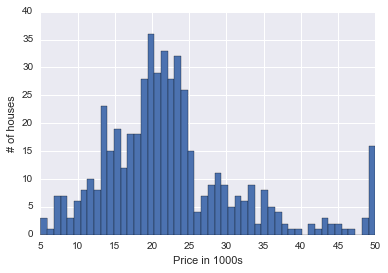

In [49]:
plt.hist(boston.target, bins=50)
plt.xlabel('Price in 1000s')
plt.ylabel('# of houses')

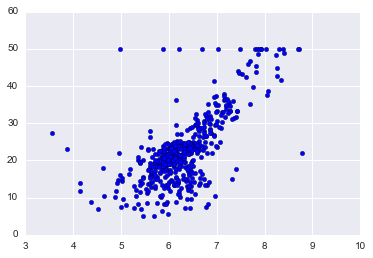

In [50]:
plt.scatter(boston.data[:,5],boston.target)

In [51]:
boston_df = pd.DataFrame(boston.data)

boston_df.columns = boston.feature_names

In [52]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


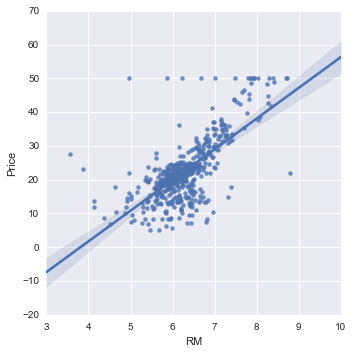

In [54]:
sns.lmplot('RM','Price',data=boston_df)

In [55]:
print len(boston_df)

506


In [56]:
### Least Squares Method

In [57]:
X = boston_df['RM']
print X.shape

#print X

(506,)


In [58]:
X = np.vstack(X)
X.shape

#print X

(506, 1)

In [59]:
Y = boston_df['Price']
print Y.shape

(506,)


In [60]:
X = np.array ([[value,1] for value in X])

In [61]:
m,b = np.linalg.lstsq(X,Y)[0]

In [62]:
m,b

(9.1021089811803115, -34.670620776438561)

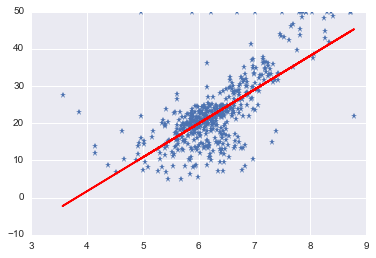

In [63]:
plt.plot(boston_df['RM'],boston_df['Price'],'*')

x = boston_df['RM']
y = m*x + b

plt.plot(x,y,'r')

In [64]:
#Finding the error

In [65]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print 'root mean square error ', rmse

root mean square error  [ 6.60307139]


In [66]:
# Multivariate Linear Regression
# Using sklearn library to compute fit and prediction model

In [67]:
import sklearn
from sklearn.linear_model import LinearRegression

In [68]:
lreg = LinearRegression()

In [69]:
X_multi = boston_df.drop('Price',1)

Y_target = boston_df['Price']

In [70]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
print 'Estimated intercept coefficient %.2f' % lreg.intercept_

print 'Number of coefficients %d' % len(lreg.coef_)

Estimated intercept coefficient 36.49
Number of coefficients 13


In [72]:
print lreg.coef_
coeff_df = DataFrame(boston_df.columns)

coeff_df.columns = ['Features']

coeff_df['Coefficient Estimates'] = Series(lreg.coef_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [73]:
coeff_df

,Features,Coefficient Estimates
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [74]:
#Training and validation

In [75]:
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X_multi,boston_df['Price'])

In [76]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [77]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
print 'Estimated intercept coefficient %.2f' % lreg.intercept_

print 'Number of coefficients %d' % len(lreg.coef_)

Estimated intercept coefficient 44.08
Number of coefficients 13


In [79]:
coeff_df_train = DataFrame(boston_df.columns)

coeff_df_train.columns = ['Features']

coeff_df_train['Coefficient Estimates'] = Series(lreg.coef_)

In [80]:
predict_train = lreg.predict(X_train)
predict_test = lreg.predict(X_test)

In [81]:
t_df = DataFrame(X_train)
t_df['originalPrice'] = Y_train
t_df['NewPrice'] = predict_train
t_df['Residual'] = Y_train - predict_train

(379,)


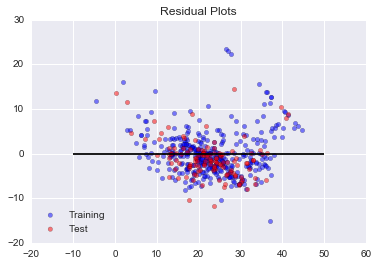

In [82]:
# Scatter plot the training data
train = plt.scatter(predict_train,(Y_train-predict_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(predict_test,(Y_test-predict_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

print Y_train.shape

# Normal Equation Implementation

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [84]:
#Housing Features
normal_X = boston_df.drop('Price',1)
normal_Y = boston_df['Price']


In [85]:
# creating a Vecator of Ones for Intial Feature X0 => assuming the value of X0 is 1
#Fititng the featues and target price into vector Matrix format
def fitNormal(normal_X,normal_Y):
    onesCoeff = np.ones(len(normal_Y), dtype=np.int)
    onesCoeff = np.vstack(onesCoeff)
    #onesCoeff = np.array(onesCoeff, copy=False, subok=True, ndmin=2).T

    # Convert X data Frame into a Matrix
    X = normal_X.as_matrix()

    # concateing the default feature of ones with provided values of features
    X = np.column_stack((onesCoeff, X))

    # Convert target Prices into a vector
    Y = np.vstack(normal_Y)
    
    return X,Y
    

In [86]:
#Caluclate the predicted value hθ(X)=Xθ
def predictNormal(X,Y):
    Xt = X.transpose()
    theta = np.dot(np.dot(linalg.pinv(np.dot(Xt,X)), Xt),Y)
    predict_value = np.dot(X,theta)
    return predict_value

In [87]:
fit_x,fit_Y = fitNormal(normal_X,normal_Y)
predict_value = predictNormal(fit_x,fit_Y)

print type(predict_value)

<type 'numpy.ndarray'>


In [88]:
#print theta.shape
#print X.shape

In [89]:
#Converting the training Target Values from list to an array
y_actual = normal_Y
y_actual = np.array(y_actual)


In [90]:
boston_df['PredictedPrice'] = predict_value
#boston_df['Residual'] = y_actual - predict_value
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,PredictedPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.008213
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.029861
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.570232
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.608141
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.942882


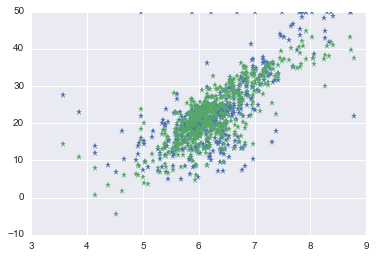

In [91]:
# Scatter plot for Training and Predicted housing Prices
plt.plot(boston_df['RM'],boston_df['Price'],'*')
plt.plot(boston_df['RM'],predict_value,'*')

In [92]:
#Calculating Statitical Measures

y_actual = np.array(y_actual)

sdR = np.std(y_actual-predict_value)
sd_predict = np.std(predict_value)
sd_train = np.std(y_actual)
rms = sqrt(mean_squared_error(y_actual, predict_value))
predited_mean  = np.mean (predict_value)
orignal_mean  = np.mean (y_actual)


#n_frame.
print rms
print "Root Mean Square value %d"%rms
print "Standard Deviation of Residual Value %d"%sdR
print (sd_predict/predited_mean)
print sd_train
print predited_mean
print orignal_mean

4.67950630064
Root Mean Square value 4
Standard Deviation of Residual Value 12
0.350913739339
9.18801154528
22.5328063241
22.5328063241


In [93]:
#print boston_df.describe

In [94]:
                            #Splitting Data into Training & Testing Data Sets 

X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X_multi,boston_df['Price'])

In [95]:

#Predict Training Data 
train_df = DataFrame(X_train)
fit_x,fit_Y = fitNormal(X_train,Y_train)
predict_train = predictNormal(fit_x,fit_Y)
train_df['Price'] = Y_train
train_df['PredictedPrice_train'] = predict_train


#Sumamry Data
rms = sqrt(mean_squared_error(fit_Y, predict_train))
sd = np.std(predict_train)
mean = np.mean(predict_train)

print rms
print sd
print mean
print ""
print train_df.head()

4.47097052702
7.81314685976
22.4773087071

        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
10   0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
208  0.13587   0.0  10.59   1.0  0.489  6.064   59.1  4.2392   4.0  277.0   
246  0.33983  22.0   5.86   0.0  0.431  6.108   34.9  8.0555   7.0  330.0   
26   0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
443  9.96654   0.0  18.10   0.0  0.740  6.485  100.0  1.9784  24.0  666.0   

     PTRATIO       B  LSTAT  Price  PredictedPrice_train  
10      15.2  392.52  20.45   15.0             19.450008  
208     18.6  381.32  14.66   24.4             23.983403  
246     19.1  390.18   9.16   24.3             19.898313  
26      21.0  376.88  14.81   16.6             15.376438  
443     20.2  386.73  18.85   15.4             18.655766  


In [96]:

#Predict Testing Data 
test_df = DataFrame(X_test)
fit_x,fit_Y = fitNormal(X_test,Y_test)
predict_test = predictNormal(fit_x,fit_Y)
test_df['Price'] = Y_test
test_df['PredictedPrice_test'] = predict_test

#Sumamry Data
sd = np.std(predict_test)
mean = np.mean(predict_test)

print sd
print mean
print test_df.head()

8.45754627467
22.6984251969
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
314  0.36920  0.0   9.90   0.0  0.544  6.567  87.3  3.6023   4.0  304.0   
46   0.18836  0.0   6.91   0.0  0.448  5.786  33.3  5.1004   3.0  233.0   
361  3.83684  0.0  18.10   0.0  0.770  6.251  91.1  2.2955  24.0  666.0   
18   0.80271  0.0   8.14   0.0  0.538  5.456  36.6  3.7965   4.0  307.0   
170  1.20742  0.0  19.58   0.0  0.605  5.875  94.6  2.4259   5.0  403.0   

     PTRATIO       B  LSTAT  Price  PredictedPrice_test  
314     18.4  395.69   9.28   23.8            26.208557  
46      17.9  396.90  14.15   20.0            16.806762  
361     20.2  350.65  14.19   19.9            19.515930  
18      21.0  288.99  11.69   20.2            15.133766  
170     14.7  292.29  14.43   17.4            22.138629  


In [97]:
# Scatter plot the training data
#predict_train = Series(predict_train)
#train = plt.scatter(predict_train,(Y_train-Series(predict_train)),c='b',alpha=0.5)

print Y_train.shape
print predict_train.shape

(379,)
(379, 1)


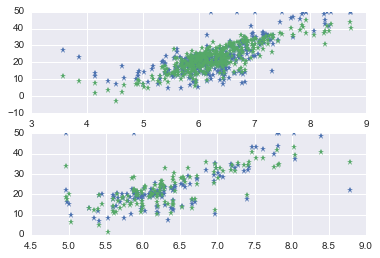

In [98]:
# Room size Scatter plot for Training and Predicted housing Prices
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.plot(train_df['RM'],train_df['Price'],'*')
ax1.plot(train_df['RM'],predict_train,'*')


ax2 = fig.add_subplot(212)
ax2.plot(test_df['RM'],test_df['Price'],'*')
ax2.plot(test_df['RM'],predict_test,'*')


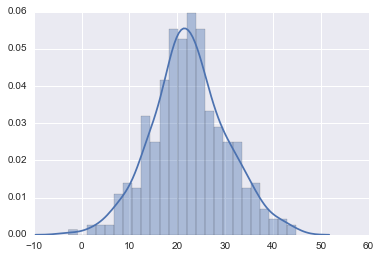

In [99]:
sns.distplot(predict_train,bins=25)

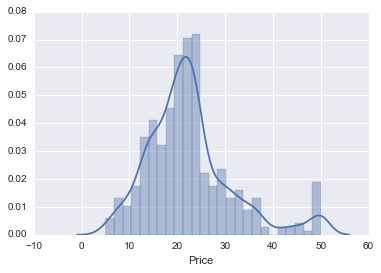

In [100]:
sns.distplot(Y_train,bins=25)